In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
correlation = gold_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<AxesSubplot:>

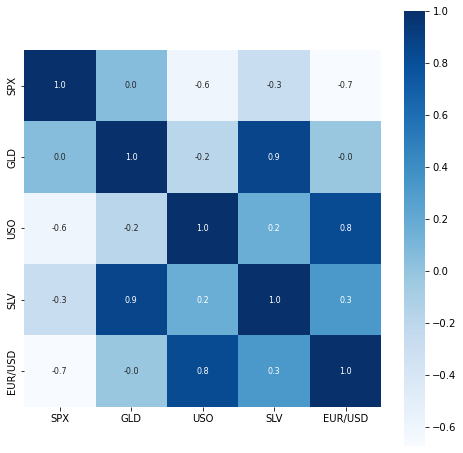

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [17]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\yaybl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

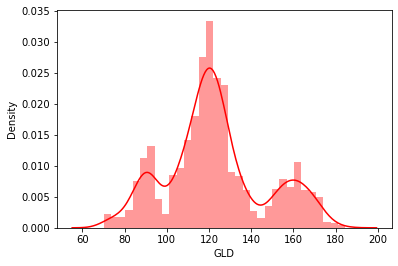

In [18]:
#distribution of the GLD price
sns.distplot(gold_data['GLD'],color = 'Red')

In [19]:
X = gold_data.drop(['Date','GLD'],axis = 1)

In [20]:
Y = gold_data['GLD']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 7)

In [23]:
random_reg = RandomForestRegressor(n_estimators = 100)

In [24]:
random_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
test_data_prediction = random_reg.predict(X_test)

In [26]:
test_data_prediction

array([106.68080051, 104.29819913, 145.25380191, 117.47610032,
       154.97840094, 127.15660151, 147.19030401, 147.62730039,
       121.68749958, 121.58589897, 119.01510124, 132.74110042,
        85.68320008,  92.47090121, 119.6684009 , 161.54839892,
       117.95169997, 115.97690058, 125.32659915, 106.79480047,
       161.08100075, 122.79650022, 161.85499817, 122.97739939,
       120.13859987, 169.66229745, 139.2960027 , 120.56440057,
        92.9706002 , 121.45800057,  94.04940118, 160.25149802,
       113.95940096, 150.99030131,  95.20019912, 156.33079837,
       117.98659851, 104.79200097, 121.08519965, 142.81019816,
       159.3407021 ,  80.11050127, 114.9059994 , 102.10889892,
        90.94219948, 177.53440201, 125.52870066,  89.57290161,
       108.2799989 , 128.87190206, 127.44380134, 128.9716012 ,
        89.48550049, 120.22900015, 140.5232013 , 152.90049975,
       123.1742009 , 127.47410103, 125.87280015,  96.64369898,
       119.51930002, 125.01020006, 124.79979899, 108.53

In [27]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [28]:
error_score

0.9883341580733614

In [29]:
Y_test = list(Y_test)

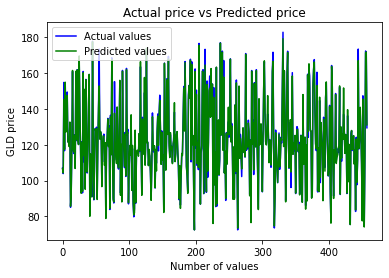

In [30]:
plt.plot(Y_test, color = 'blue', label = 'Actual values')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted values')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [32]:
#building a prediction system
input_data = (1447.160034,78.470001,15.1800,1.471692)
array = np.asarray(input_data)

array_reshape = array.reshape(1,-1) #we want to make the prediction for only one value

prediction = random_reg.predict(array_reshape)

In [33]:
prediction

array([85.07410076])

In [ ]:
#actual value is 84.86